## Leitura e Preprocessamento dos Dados

In [4]:
!unzip output.zip

Archive:  output.zip
   creating: content/output/
   creating: content/output/doenças_hereditárias/
  inflating: content/output/doenças_hereditárias/thesis9.json  
  inflating: content/output/doenças_hereditárias/thesis1.json  
  inflating: content/output/doenças_hereditárias/thesis10.json  
  inflating: content/output/doenças_hereditárias/thesis2.json  
  inflating: content/output/doenças_hereditárias/thesis3.json  
  inflating: content/output/doenças_hereditárias/thesis4.json  
  inflating: content/output/doenças_hereditárias/thesis7.json  
  inflating: content/output/doenças_hereditárias/thesis5.json  
  inflating: content/output/doenças_hereditárias/thesis6.json  
  inflating: content/output/doenças_hereditárias/thesis8.json  
   creating: content/output/reconhecimento_facial/
  inflating: content/output/reconhecimento_facial/thesis9.json  
  inflating: content/output/reconhecimento_facial/thesis1.json  
  inflating: content/output/reconhecimento_facial/thesis10.json  
  inflating:

### Requirements

In [5]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import numpy as np
import os
import glob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import altair as alt
import re

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Leitura e Concatenação 

In [7]:
path = os.getcwd()
files = glob.glob(os.path.join(path, "content/output/*/*.json"))

In [8]:
jsons = [pd.read_json(file, lines=True) for file in files]
df = pd.concat(jsons, ignore_index=True)

df["subject"] = [os.path.split(os.path.dirname(file))[-1] for file in files]

In [9]:
df

,title,abstract,subject
0,Projeto sífilis não : efeitos na sífilis congê...,"Em pleno século XXI, a sífilis ainda se aprese...",doenças_hereditárias
1,Avaliação da frequência de mutações somáticas ...,Realizar uma comparação das características cl...,doenças_hereditárias
2,MicroRNAs na variante cardíaca da Doença de Fa...,A cardiomiopatia hipertrófica (CMH) é uma doen...,doenças_hereditárias
3,"O Naturalismo em Morbus : romance patológico, ...","No século XIX, devido aos avanços científicos ...",doenças_hereditárias
4,Análise funcional do gene FOXO3 na indução de ...,As β-hemoglobinopatias são conhecidas como des...,doenças_hereditárias
5,Compartilhando genes e identidades : orientaçã...,A genética tem ocupado espaço cada vez maior e...,doenças_hereditárias
6,Análise computacional e gênica de fatores de t...,Os fatores Kruppel-like (KLF) são responsáveis...,doenças_hereditárias
7,Biossensor para diagnóstico molecular da fibro...,A Fibrose Cística (FC) um distúrbio genético q...,doenças_hereditárias
8,Perfil clínico e epidemiológico dos pacientes ...,A Hidradenite Supurativa é uma doença crônica ...,doenças_hereditárias
9,Crianças vivendo com hemofilia A grave : reper...,"Introdução: A hemofilia é uma doença rara, her...",doenças_hereditárias


In [10]:
df.describe()

,title,abstract,subject
count,50,50,50
unique,50,50,5
top,Projeto sífilis não : efeitos na sífilis congê...,"Em pleno século XXI, a sífilis ainda se aprese...",doenças_hereditárias
freq,1,1,10


### Stopwords

English and portuguese

In [11]:
languages = ['english', 'portuguese']

In [12]:
list_stop = stopwords.words(languages)
print(list_stop[:10])
print(list_stop[-10:])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['tivessem', 'tivéssemos', 'tu', 'tua', 'tuas', 'um', 'uma', 'você', 'vocês', 'vos']


### Preprocessing

In [13]:
corpus = df['abstract'].copy()
preprocessed_corpus = []

for abstract in corpus:
    
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(abstract))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    #Normalize
    document = unidecode(document)
    
    document = document.split()
    
    document = [word for word in document if word not in list_stop and word.isalpha()]
    
    document = " ".join(document)
        
    preprocessed_corpus.append(document)

In [14]:
print(len(corpus))
print(len(preprocessed_corpus))

50
50


In [15]:
corpus[0]

'Em pleno século XXI, a sífilis ainda se apresenta como um agravo mundial sem\r\ncontrole, com maiores taxas de incidência em localidades mais pobres. A doença é\r\ntransmitida sexualmente causando maiores danos às gestantes e seus conceptos. O\r\nBrasil enfrenta uma reemergência da doença e o estado de Pernambuco possui taxa\r\nde incidência acima da média do país. A dissertação analisa a implantação do\r\nprojeto “Sífilis Não” no estado de Pernambuco e o efeito na taxa de incidência de\r\nsífilis congênita após um ano. O projeto tem como objetivo reduzir a sífilis adquirida\r\ne em gestante e eliminar a sífilis congênita promovendo ações conjuntas entre as\r\náreas de vigilância e atenção em saúde. Adicionalmente, foi feita exploração\r\nespacial da sífilis em todo o Estado, de 2010 a 2019, que identificou tendência de\r\ncrescimento com interiorização da doença. Foram encontradas incidências mais\r\nelevadas nas Macrorregiões Metropolitana, Agreste e Sertão. Existia uma maior\r\ndet

In [16]:
preprocessed_corpus[0]

'pleno seculo xxi sifilis ainda apresenta agravo mundial controle maiores taxas incidencia localidades pobres doenca transmitida sexualmente causando maiores danos gestantes conceptos brasil enfrenta reemergencia doenca estado pernambuco possui taxa incidencia acima media pais dissertacao analisa implantacao projeto sifilis nao estado pernambuco efeito taxa incidencia sifilis congenita apos ano projeto objetivo reduzir sifilis adquirida gestante eliminar sifilis congenita promovendo acoes conjuntas areas vigilancia atencao saude adicionalmente feita exploracao espacial sifilis todo estado identificou tendencia crescimento interiorizacao doenca encontradas incidencias elevadas macrorregioes metropolitana agreste sertao existia maior deteccao sifilis congenita gestantes reverteu partir ano autocorrelacao espacial identificou municipios criticos incidencia sifilis sendo macrorregiao metropolitana dois agreste projeto considerado implantado municipios reducao taxa incidencia sifilis congen

### Feature Extration

In [17]:
count_vect = CountVectorizer(stop_words=list_stop, min_df=0.05, max_df=0.99)
count_vect.fit(preprocessed_corpus)

CountVectorizer(max_df=0.99, min_df=0.05,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [18]:
print('Tamanho do vocabulário: ', len(count_vect.vocabulary_))
counter = 0
for _, count in count_vect.vocabulary_.items():
    counter += count
    
print('Quantidade total de palavras: ', counter)

Tamanho do vocabulário:  568
Quantidade total de palavras:  161028


In [19]:
count_vect.vocabulary_

{'ainda': 8,
 'apresenta': 37,
 'controle': 122,
 'maiores': 317,
 'taxas': 511,
 'incidencia': 288,
 'doenca': 179,
 'brasil': 75,
 'estado': 205,
 'pernambuco': 394,
 'possui': 413,
 'media': 322,
 'pais': 384,
 'dissertacao': 174,
 'nao': 348,
 'efeito': 185,
 'apos': 35,
 'objetivo': 365,
 'acoes': 4,
 'areas': 45,
 'atencao': 54,
 'saude': 472,
 'feita': 242,
 'todo': 525,
 'tendencia': 517,
 'crescimento': 125,
 'encontradas': 192,
 'maior': 316,
 'deteccao': 156,
 'partir': 389,
 'sendo': 476,
 'dois': 180,
 'considerado': 116,
 'reducao': 458,
 'sao': 470,
 'aumento': 60,
 'recife': 453,
 'possivel': 411,
 'efeitos': 186,
 'realizadas': 448,
 'resultados': 468,
 'perfil': 390,
 'criancas': 126,
 'anos': 28,
 'ensino': 194,
 'fundamental': 255,
 'pre': 415,
 'realizado': 449,
 'diagnostico': 161,
 'tratamento': 534,
 'desafios': 140,
 'cuidado': 131,
 'especial': 201,
 'necessidade': 353,
 'ampliar': 19,
 'estudos': 215,
 'futuros': 256,
 'necessarios': 352,
 'melhor': 325,
 'id

#### TF-IDF

In [20]:
X = count_vect.transform(preprocessed_corpus)

In [21]:
X.shape

(50, 568)

In [22]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X)

TfidfTransformer()

In [23]:
X_tfidf = tfidf_transformer.transform(X)

In [24]:
X_tfidf.shape

(50, 568)

In [26]:
count_vect.get_feature_names_out()

array(['aborda', 'abordagem', 'abordagens', 'acao', 'acoes', 'adotadas',
       'advindos', 'agentes', 'ainda', 'alem', 'algoritmo', 'algoritmos',
       'algumas', 'alguns', 'ambiente', 'ambientes', 'ambito', 'amostra',
       'amostras', 'ampliar', 'amplificacao', 'amplo', 'analisadas',
       'analisado', 'analisados', 'analise', 'analises', 'analysis',
       'anos', 'antes', 'apenas', 'apesar', 'aplicacao', 'aplicacoes',
       'apoio', 'apos', 'aprendizagem', 'apresenta', 'apresentado',
       'apresentados', 'apresentam', 'apresentar', 'apresentaram',
       'aprimoramento', 'area', 'areas', 'arquitetura', 'arquiteturas',
       'arte', 'artificial', 'aspectos', 'assim', 'associacao', 'ate',
       'atencao', 'atendimento', 'atividade', 'atraves', 'atual',
       'atualmente', 'aumento', 'avaliacao', 'avaliada', 'avaliar',
       'avaliaram', 'avancos', 'base', 'baseada', 'baseadas', 'baseado',
       'baseados', 'bases', 'bastante', 'bem', 'boa', 'brasil', 'busca',
       'cada

### Análise das Caracteristicas textuais

In [27]:
sorted_X_indices = np.argsort(X.toarray(), axis=1)[:, ::-1]
sorted_Xtfidf_indices = np.argsort(X_tfidf.toarray(), axis=1)[:,::-1]

print('Termos mais comuns nos 10 primeiros documentos:')
for i in range(10):
    print(count_vect.get_feature_names_out()[sorted_X_indices[i, :3]])

print('\nTermos mais relevantes nos 10 primeiros documentos:')
for i in range(10):
    print(count_vect.get_feature_names_out()[sorted_Xtfidf_indices[i, :3]])

print('\nTermos mais relevantes na base de dados:')
mean_Xtfidf = X_tfidf.mean(axis=0)
sorted_meanXtfidf_indices = np.argsort(mean_Xtfidf)[::-1]
print(count_vect.get_feature_names_out()[sorted_meanXtfidf_indices[:3]])

Termos mais comuns nos 10 primeiros documentos:
['incidencia' 'doenca' 'estado']
['pacientes' 'mutacao' 'geneticos']
['individuos' 'gene' 'mutacoes']
['trabalho' 'neste' 'diversos']
['pacientes' 'expressao' 'gene']
['genetica' 'pessoas' 'saude']
['mutacoes' 'criancas' 'expressao']
['deteccao' 'pode' 'diagnostico']
['doenca' 'pacientes' 'pernambuco']
['criancas' 'doenca' 'irmaos']

Termos mais relevantes nos 10 primeiros documentos:
['incidencia' 'doenca' 'acoes']
['pacientes' 'mutacao' 'geracao']
['individuos' 'mutacoes' 'gene']
['neste' 'social' 'consequentemente']
['pacientes' 'expressao' 'gene']
['genetica' 'pessoas' 'saude']
['mutacoes' 'criancas' 'expressao']
['deteccao' 'diagnostico' 'pode']
['doenca' 'familiar' 'pacientes']
['criancas' 'doenca' 'irmaos']

Termos mais relevantes na base de dados:
[['cena' 'entrada' 'escala' 'garante' 'conjunto' 'taxas' 'analisados'
  'padroes' 'aborda' 'frequencia' 'menos' 'classificacao' 'ganho'
  'requisitos' 'estatistico' 'decadas' 'nesta' 'ra

### Visualisation

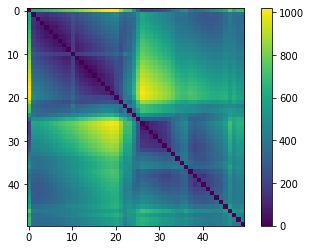

In [28]:
p = pairwise_distances(np.argsort(X_tfidf.toarray(), axis=0)[:,::-1], metric='euclidean')
plt.imshow(p, interpolation='nearest')
plt.colorbar()

In [29]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), index=df['subject'], columns=count_vect.get_feature_names_out())
tfidf_df = tfidf_df.groupby('subject').mean()
tfidf_df.head()

,aborda,abordagem,abordagens,acao,acoes,adotadas,advindos,agentes,ainda,alem,...,velocidade,vem,verificar,vez,vezes,virtual,visa,visando,vista,voltadas
subject,,,,,,,,,,,,,,,,,,,,,
analise_forense,0.000000,0.000000,0.000000,0.000000,0.000000,0.032066,0.000000,0.000000,0.026757,0.052650,...,0.000000,0.009985,0.000000,0.007381,0.000000,0.000000,0.009726,0.007581,0.026768,0.000000
doenças_hereditárias,0.007224,0.010411,0.000000,0.000000,0.031154,0.000000,0.000000,0.000000,0.015875,0.029013,...,0.000000,0.000000,0.007224,0.005812,0.000000,0.000000,0.007939,0.000000,0.000000,0.006181
inteligencia_artificial,0.000000,0.019899,0.000000,0.030954,0.029255,0.000000,0.000000,0.111219,0.013071,0.022675,...,0.037945,0.000000,0.000000,0.023131,0.010420,0.012286,0.000000,0.000000,0.000000,0.019314
internet_das_coisas,0.014412,0.000000,0.000000,0.007384,0.000000,0.000000,0.014201,0.000000,0.026008,0.005274,...,0.000000,0.012208,0.008009,0.005255,0.021377,0.035478,0.013626,0.008659,0.012879,0.000000
reconhecimento_facial,0.000000,0.018764,0.029577,0.000000,0.000000,0.000000,0.016384,0.000000,0.018196,0.016677,...,0.000000,0.007187,0.016419,0.012421,0.000000,0.000000,0.000000,0.007074,0.000000,0.000000


In [30]:
tfidf_df = tfidf_df.stack().reset_index()
tfidf_df.head()

,subject,level_1,0
0,analise_forense,aborda,0.0
1,analise_forense,abordagem,0.0
2,analise_forense,abordagens,0.0
3,analise_forense,acao,0.0
4,analise_forense,acoes,0.0


In [31]:
tfidf_df = tfidf_df.rename(columns={0:'TFIDF', 'subject': 'Tema','level_1': 'Termo'})
tfidf_df

,Tema,Termo,TFIDF
0,analise_forense,aborda,0.000000
1,analise_forense,abordagem,0.000000
2,analise_forense,abordagens,0.000000
3,analise_forense,acao,0.000000
4,analise_forense,acoes,0.000000
...,...,...,...
2835,reconhecimento_facial,virtual,0.000000
2836,reconhecimento_facial,visa,0.000000
2837,reconhecimento_facial,visando,0.007074
2838,reconhecimento_facial,vista,0.000000


In [32]:
top_tfidf = tfidf_df.sort_values(by=['Tema','TFIDF'], ascending=[True,False]).groupby(['Tema']).head(3)
top_tfidf

,Tema,Termo,TFIDF
248,analise_forense,forense,0.229731
178,analise_forense,dna,0.195069
261,analise_forense,genetica,0.095144
747,doenças_hereditárias,doenca,0.171344
949,doenças_hereditárias,pacientes,0.143771
694,doenças_hereditárias,criancas,0.113518
1431,inteligencia_artificial,inteligencia,0.137936
1143,inteligencia_artificial,agentes,0.111219
1664,inteligencia_artificial,trabalho,0.081028
2004,internet_das_coisas,internet,0.229830


In [33]:
# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['TFIDF'] = top_tfidf_plusRand['TFIDF'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'Tema:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("TFIDF", order="descending")],
    groupby = ["Tema"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'TFIDF:Q'
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'Termo:N',
    color = alt.condition(alt.datum.TFIDF >= 0.2, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + text).properties(width = 600)

alt.LayerChart(...)